In [67]:
import pandas as pd
df = pd.read_json('snli_1.0_dev.jsonl', lines = True)

In [68]:
df.head()

,annotator_labels,captionID,gold_label,pairID,sentence1,sentence1_binary_parse,sentence1_parse,sentence2,sentence2_binary_parse,sentence2_parse
0,"[neutral, entailment, neutral, neutral, neutral]",4705552913.jpg#2,neutral,4705552913.jpg#2r1n,Two women are embracing while holding to go pa...,( ( Two women ) ( ( are ( embracing ( while ( ...,(ROOT (S (NP (CD Two) (NNS women)) (VP (VBP ar...,The sisters are hugging goodbye while holding ...,( ( The sisters ) ( ( are ( ( hugging goodbye ...,(ROOT (S (NP (DT The) (NNS sisters)) (VP (VBP ...
1,"[entailment, entailment, entailment, entailmen...",4705552913.jpg#2,entailment,4705552913.jpg#2r1e,Two women are embracing while holding to go pa...,( ( Two women ) ( ( are ( embracing ( while ( ...,(ROOT (S (NP (CD Two) (NNS women)) (VP (VBP ar...,Two woman are holding packages.,( ( Two woman ) ( ( are ( holding packages ) )...,(ROOT (S (NP (CD Two) (NN woman)) (VP (VBP are...
2,"[contradiction, contradiction, contradiction, ...",4705552913.jpg#2,contradiction,4705552913.jpg#2r1c,Two women are embracing while holding to go pa...,( ( Two women ) ( ( are ( embracing ( while ( ...,(ROOT (S (NP (CD Two) (NNS women)) (VP (VBP ar...,The men are fighting outside a deli.,( ( The men ) ( ( are ( fighting ( outside ( a...,(ROOT (S (NP (DT The) (NNS men)) (VP (VBP are)...
3,"[entailment, entailment, entailment, entailmen...",2407214681.jpg#0,entailment,2407214681.jpg#0r1e,"Two young children in blue jerseys, one with t...",( ( ( Two ( young children ) ) ( in ( ( ( ( ( ...,(ROOT (S (NP (NP (CD Two) (JJ young) (NNS chil...,Two kids in numbered jerseys wash their hands.,( ( ( Two kids ) ( in ( numbered jerseys ) ) )...,(ROOT (S (NP (NP (CD Two) (NNS kids)) (PP (IN ...
4,"[neutral, neutral, neutral, entailment, entail...",2407214681.jpg#0,neutral,2407214681.jpg#0r1n,"Two young children in blue jerseys, one with t...",( ( ( Two ( young children ) ) ( in ( ( ( ( ( ...,(ROOT (S (NP (NP (CD Two) (JJ young) (NNS chil...,Two kids at a ballgame wash their hands.,( ( ( Two kids ) ( at ( a ballgame ) ) ) ( ( w...,(ROOT (S (NP (NP (CD Two) (NNS kids)) (PP (IN ...


In [69]:
df.to_csv('dev.csv')

In [70]:
df['gold_label'].value_counts()

entailment       3329
contradiction    3278
neutral          3235
-                 158
Name: gold_label, dtype: int64

In [ ]:
df[:1000].to_csv('small_train.csv')

In [91]:
import os
os.chdir('../selected_hard_dev/')
print(os.getcwd())

/Users/gowtam/ASU/Fall'21/CSE 576/Projects/Project 2/snli_1.0/selected_hard_dev


In [92]:
import pandas as pd
ep0 = pd.read_csv('epoch_0_predictions.csv')
ep1 = pd.read_csv('epoch_1_predictions.csv')
ep2 = pd.read_csv('epoch_2_predictions.csv')
ep3 = pd.read_csv('epoch_3_predictions.csv')
ep4 = pd.read_csv('epoch_4_predictions.csv')

In [93]:
import numpy as np
difficulty = []
confidence = []
for i in range((5000)):
#     if ep0.iloc[i]['label'] >3:
#         print(ep0.iloc[i]['label']+2)
    val1 = ep0.iloc[i][int(ep0.iloc[i]['label'])+2]
    val2 = ep1.iloc[i][int(ep1.iloc[i]['label'])+2]
    val3 = ep2.iloc[i][int(ep2.iloc[i]['label'])+2]
    val4 = ep3.iloc[i][int(ep3.iloc[i]['label'])+2]
    val5 = ep4.iloc[i][int(ep4.iloc[i]['label'])+2]
    
    confidence.append((val1+val2+val3+val4+val5)/5)
    difficulty.append(np.std([val1,val2,val3,val4,val5]))
    

[Text(0.5, 0, 'difficulty'), Text(0, 0.5, 'confidence')]

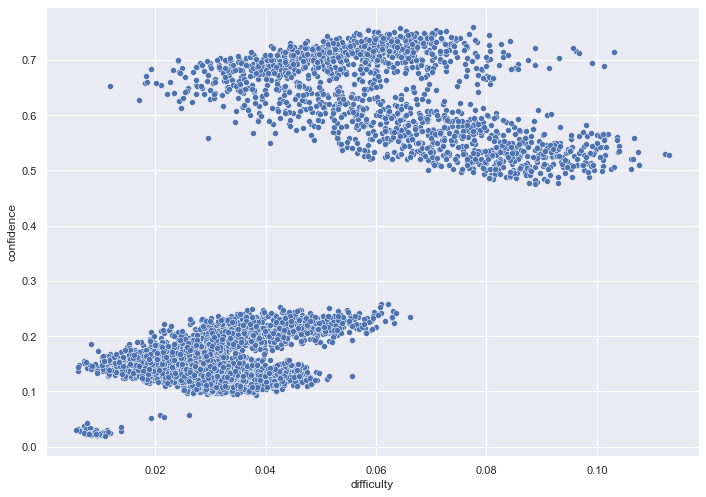

In [94]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.scatterplot(x= difficulty, y = confidence)
ax.set(xlabel='difficulty', ylabel='confidence')

In [45]:
confidence_sorted_indices = sorted(range(len(confidence)),key=confidence.__getitem__)[::-1]

In [42]:
confidence_sorted_indices[0:5]
confidence[confidence_sorted_indices[0]]

NameError: name 'confidence_sorted_indices' is not defined

In [47]:
train_df = pd.read_csv('train_5000.csv')

In [48]:
train_df.head()

,Unnamed: 0,annotator_labels,captionID,gold_label,pairID,sentence1,sentence1_binary_parse,sentence1_parse,sentence2,sentence2_binary_parse,sentence2_parse
0,0,['neutral'],3416050480.jpg#4,neutral,3416050480.jpg#4r1n,A person on a horse jumps over a broken down a...,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,A person is training his horse for a competition.,( ( A person ) ( ( is ( ( training ( his horse...,(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...
1,1,['contradiction'],3416050480.jpg#4,contradiction,3416050480.jpg#4r1c,A person on a horse jumps over a broken down a...,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,"A person is at a diner, ordering an omelette.",( ( A person ) ( ( ( ( is ( at ( a diner ) ) )...,(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...
2,2,['entailment'],3416050480.jpg#4,entailment,3416050480.jpg#4r1e,A person on a horse jumps over a broken down a...,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,"A person is outdoors, on a horse.","( ( A person ) ( ( ( ( is outdoors ) , ) ( on ...",(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...
3,3,['neutral'],2267923837.jpg#2,neutral,2267923837.jpg#2r1n,Children smiling and waving at camera,( Children ( ( ( smiling and ) waving ) ( at c...,(ROOT (NP (S (NP (NNP Children)) (VP (VBG smil...,They are smiling at their parents,( They ( are ( smiling ( at ( their parents ) ...,(ROOT (S (NP (PRP They)) (VP (VBP are) (VP (VB...
4,4,['entailment'],2267923837.jpg#2,entailment,2267923837.jpg#2r1e,Children smiling and waving at camera,( Children ( ( ( smiling and ) waving ) ( at c...,(ROOT (NP (S (NP (NNP Children)) (VP (VBG smil...,There are children present,( There ( ( are children ) present ) ),(ROOT (S (NP (EX There)) (VP (VBP are) (NP (NN...


In [65]:
selected_data_easy = train_df.iloc[confidence_sorted_indices[:4000]]
selected_data_ambi = train_df.iloc[confidence_sorted_indices[4000:4700]]
selected_data_hard = train_df.iloc[confidence_sorted_indices[4700:]]

In [64]:
confidence[confidence_sorted_indices[4700]]

0.5492147833108902

In [39]:
selected_data.shape

(400, 11)

In [66]:
selected_data_easy.to_csv('selected_data_easy.csv')
selected_data_ambi.to_csv('selected_data_ambi.csv')
selected_data_hard.to_csv('selected_data_hard.csv')

In [2]:
import pandas as pd
train_df_easy = pd.read_csv('selected_data_easy.csv')
train_df_ambi = pd.read_csv('selected_data_ambi.csv')
train_df_hard = pd.read_csv('selected_data_hard.csv')

In [20]:
train_df_ambi.shape

(700, 12)

In [21]:
train_easy_50_hard_100 = pd.concat([train_df_easy.iloc[:2000], train_df_hard])

In [22]:
train_easy_50_hard_100.to_csv('train_easy_50_hard_100.csv')

In [44]:
train_easy_100_hard_50 = pd.concat([train_df_easy, train_df_hard.iloc[:150]])
train_easy_100_hard_50.to_csv('train_easy_100_hard_50.csv')

In [23]:
train_easy_75_hard_100 = pd.concat([train_df_easy.iloc[:3000], train_df_hard])

In [24]:
train_easy_75_hard_100.to_csv('train_easy_75_hard_100.csv')

In [25]:
train_easy_100_hard_100 = pd.concat([train_df_easy, train_df_hard])

In [26]:
train_easy_100_hard_100.to_csv('train_easy_100_hard_100.csv')

In [27]:
train_easy_50_ambi_50_hard_100 = pd.concat([train_df_easy.iloc[:2000], train_df_ambi.iloc[:350],train_df_hard])

In [28]:
train_easy_50_ambi_50_hard_100.to_csv('train_easy_50_ambi_50_hard_100.csv')

In [46]:
train_easy_100_ambi_50_hard_50 = pd.concat([train_df_easy, train_df_ambi.iloc[:350],train_df_hard.iloc[:150]])
train_easy_100_ambi_50_hard_50.to_csv('train_easy_100_ambi_50_hard_50.csv')

In [47]:
train_easy_100_ambi_25_hard_50 = pd.concat([train_df_easy, train_df_ambi.iloc[:175],train_df_hard.iloc[:150]])
train_easy_100_ambi_25_hard_50.to_csv('train_easy_100_ambi_25_hard_50.csv')

In [48]:
train_easy_100_ambi_25_hard_75 = pd.concat([train_df_easy, train_df_ambi.iloc[:175],train_df_hard.iloc[:225]])
train_easy_100_ambi_25_hard_75.to_csv('train_easy_100_ambi_25_hard_75.csv')

In [49]:
train_easy_100_ambi_50_hard_75 = pd.concat([train_df_easy, train_df_ambi.iloc[:350],train_df_hard.iloc[:225]])
train_easy_100_ambi_50_hard_75.to_csv('train_easy_100_ambi_50_hard_75.csv')

In [52]:
train_easy_100_ambi_50_hard_100 = pd.concat([train_df_easy, train_df_ambi.iloc[:350],train_df_hard])
train_easy_100_ambi_50_hard_100.to_csv('train_easy_100_ambi_50_hard_100.csv')

In [37]:
train_easy_50_ambi_50 = pd.concat([train_df_easy.iloc[:2000], train_df_ambi.iloc[:350]])
train_easy_50_ambi_50.to_csv('train_easy_50_ambi_50.csv')

# need to train later
train_easy_75_ambi_100 = pd.concat([train_df_easy.iloc[:3000], train_df_ambi])
train_easy_75_ambi_100.to_csv('train_easy_75_ambi_100.csv')
train_easy_100_ambi_100 = pd.concat([train_df_easy, train_df_ambi])
train_easy_100_ambi_100.to_csv('train_easy_100_ambi_100.csv')

In [35]:
train_ambi_50_hard_50 = pd.concat([train_df_ambi.iloc[:350], train_df_hard.iloc[:150]])
train_ambi_50_hard_50.to_csv('train_ambi_50_hard_50.csv')
train_ambi_75_hard_100 = pd.concat([train_df_ambi.iloc[:525], train_df_hard])
train_ambi_75_hard_100.to_csv('train_ambi_75_hard_100.csv')
train_ambi_100_hard_100 = pd.concat([train_df_ambi, train_df_hard])
train_ambi_100_hard_100.to_csv('train_ambi_100_hard_100.csv')

In [40]:
import seaborn as sns
sns.countplot(x=['a','b'], y=[10, 20])

ModuleNotFoundError: No module named 'seaborn'

In [41]:
!pip3 install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 292 kB 2.7 MB/s eta 0:00:01
     |████████████████████████████████| 10.6 MB 27.9 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 4.7 MB 30.0 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 35.0 MB 17.7 MB/s eta 0:00:01
    ERROR: Command errored out with exit status 1:
     command: /Library/Developer/CommandLineTools/usr/bin/python3 -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/c5/9r02nxh502x67syvvt45ssr40000gn/T/pip-install-5h770rw1/matplotlib/setup.py'"'"'; __file__='"'"'/private/var/folders/c5/9r02nxh502x67syvvt45ssr40000gn/T/pip-install-5h770rw1/matplotlib/setup.py'"'"

      C compiler: clang -Wno-unused-result -Wsign-compare -Wunreachable-code -fno-common -dynamic -DNDEBUG -g -fwrapv -O3 -Wall -iwithsysroot/System/Library/Frameworks/System.framework/PrivateHeaders -iwithsysroot/Applications/Xcode.app/Contents/Developer/Library/Frameworks/Python3.framework/Versions/3.8/Headers -arch arm64 -arch x86_64 -Werror=implicit-function-declaration
    
      compile options: '-Inumpy/core/src/common -Inumpy/core/src -Inumpy/core -Inumpy/core/src/npymath -Inumpy/core/src/multiarray -Inumpy/core/src/umath -Inumpy/core/src/npysort -Inumpy/core/src/_simd -I/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.8/include/python3.8 -Ibuild/src.macosx-10.14-x86_64-3.8/numpy/core/src/common -Ibuild/src.macosx-10.14-x86_64-3.8/numpy/core/src/npymath -c'
      extra options: '-mpopcnt'
      CCompilerOpt.feature_test[1466] : testing feature 'POPCNT' with flags (-msse -msse2 -msse3 -mssse3 -msse4.1 -mpopcnt)
      C compiler: clang -Wno-unus

You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
